# Retail Sales Analytics using MySQL & Python

### Objective
Demonstrate an end-to-end data analytics workflow by ingesting retail transaction data
into a MySQL database, performing SQL-based analysis, and visualizing business insights
using Python.


In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user=input("MySQL Username: "),
    password=input("MySQL Password: "),
    database="retail_db"
)

MySQL Username:  tgurley1
MySQL Password:  Tg?00866801


In [3]:
query = "SELECT COUNT(*) AS row_count FROM retail_sales;"
pd.read_sql(query, conn)

C:\Users\solan\AppData\Local\Temp\ipykernel_17280\3801080831.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,row_count
0,406829


## How does revenue trend over time?

In [4]:
query = """
SELECT 
    DATE_FORMAT(InvoiceDate, '%Y-%m') AS Month,
    ROUND(SUM(Revenue), 2) AS MonthlyRevenue
FROM retail_sales
GROUP BY Month
ORDER BY Month;
"""

monthly_revenue = pd.read_sql(query, conn)
monthly_revenue

C:\Users\solan\AppData\Local\Temp\ipykernel_17280\2469455846.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_revenue = pd.read_sql(query, conn)


,Month,MonthlyRevenue
0,2010-12,554604.02
1,2011-01,475074.38
2,2011-02,436546.15
3,2011-03,579964.61
4,2011-04,426047.85
5,2011-05,648251.08
6,2011-06,608013.16
7,2011-07,574238.48
8,2011-08,616368.00
9,2011-09,931440.37


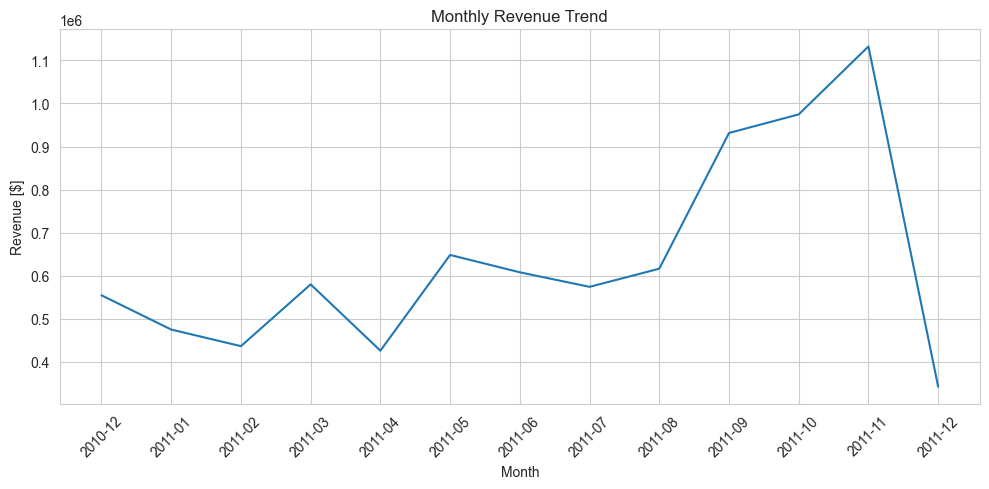

In [5]:
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue["Month"], monthly_revenue["MonthlyRevenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue [$]")
plt.tight_layout()
plt.show()

**Insight:**  
Revenue displays clear seasonality, with noticeable growth toward the end of the year.
This suggests opportunities for targeted promotions and inventory planning during peak months.

## What countries generate the most revenue?

In [6]:
query = """
SELECT Country, ROUND(SUM(Revenue), 2) AS TotalRevenue
FROM retail_sales
GROUP BY Country
ORDER BY TotalRevenue DESC
LIMIT 10;
"""

top_countries = pd.read_sql(query, conn)
top_countries

C:\Users\solan\AppData\Local\Temp\ipykernel_17280\686230167.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_countries = pd.read_sql(query, conn)


,Country,TotalRevenue
0,United Kingdom,6767873.39
1,Netherlands,284661.54
2,EIRE,250285.22
3,Germany,221698.21
4,France,196712.84
5,Australia,137077.27
6,Switzerland,55739.40
7,Spain,54774.58
8,Belgium,40910.96
9,Sweden,36595.91


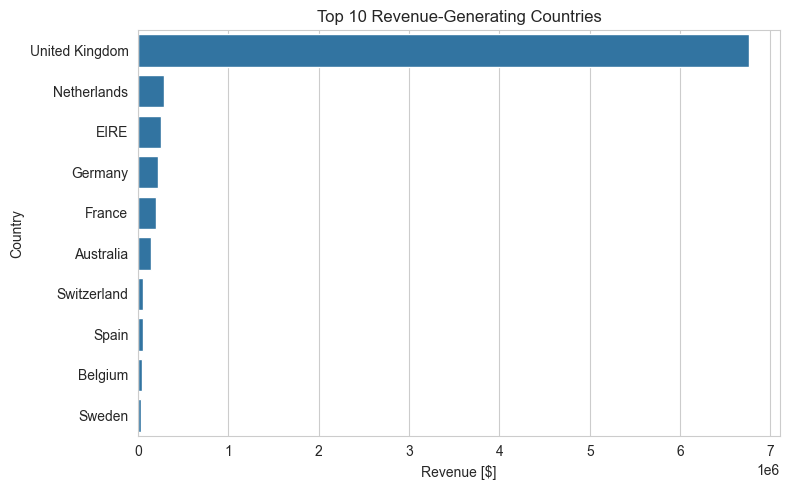

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_countries,
    x="TotalRevenue",
    y="Country"
)
plt.title("Top 10 Revenue-Generating Countries")
plt.xlabel("Revenue [$]")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Insight:**  
Revenue is heavily concentrated in a small number of countries, led by the UK.
This indicates both strong regional performance and potential expansion opportunities
in underrepresented markets.

## Who are the highest value customers?

In [8]:
query = """
SELECT CustomerID, ROUND(SUM(Revenue), 2) AS TotalSpent
FROM retail_sales
GROUP BY CustomerID
ORDER BY TotalSpent DESC
LIMIT 10;
"""

top_customers = pd.read_sql(query, conn)
top_customers

C:\Users\solan\AppData\Local\Temp\ipykernel_17280\1977722185.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_customers = pd.read_sql(query, conn)


,CustomerID,TotalSpent
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


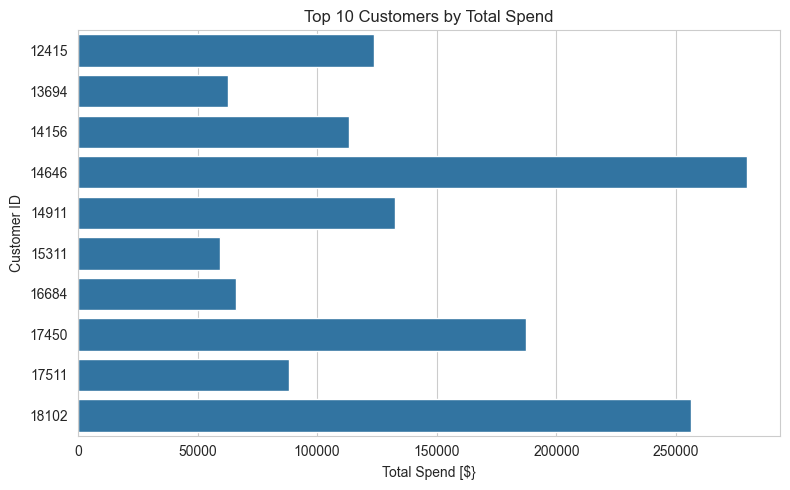

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_customers,
    x="TotalSpent",
    y="CustomerID",
    orient="h"
)
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Total Spend [$}")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

**Insight:**  
A small subset of customers accounts for a disproportionate share of revenue.
Retaining these high-value customers could significantly impact overall profitability.

In [10]:
conn.close()

## Summary & Takeaways

- Successfully built an end-to-end analytics pipeline using Python and MySQL
- Identified seasonal revenue patterns and geographic concentration
- Highlighted the impact of high-value customers on total revenue

This type of rapid exploratory analysis mirrors the workflow commonly used in
data consulting engagements to quickly generate actionable insights for clients.